<a href="https://colab.research.google.com/github/Tasnim-Jahan/Course_Deep_Learning/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes (1).csv


In [ ]:
diabetes_df = pd.read_csv(io.BytesIO(uploaded["diabetes.csv"]))
display(diabetes_df)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
diabetes_df.isnull().sum().sort_values(ascending = False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

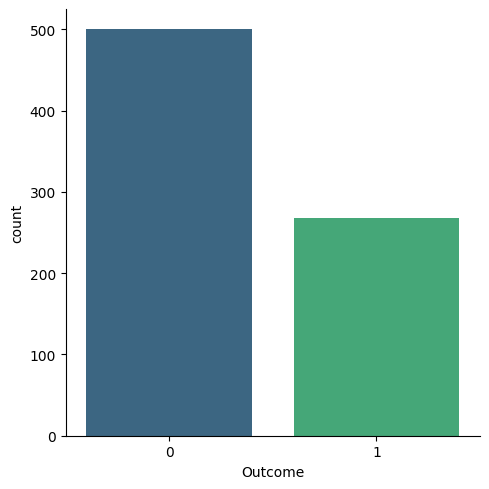

In [ ]:
sns.catplot(x = 'Outcome', kind = 'count', data = diabetes_df, palette='viridis')

In [ ]:
diabetes_df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
from sklearn.utils import resample
df_0 = diabetes_df[diabetes_df['Outcome'] == 0]
df_1 = diabetes_df[diabetes_df['Outcome'] == 1]

In [ ]:
# apply resample
df_1_over_sampling = resample(df_1 , n_samples = 500, replace = True, random_state = 123)

In [ ]:
diabetes_df_balanced = pd.concat([df_0, df_1_over_sampling])

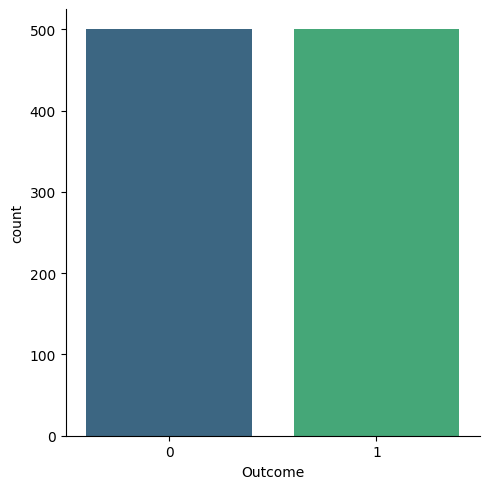

In [ ]:
sns.catplot(x = 'Outcome', kind = 'count', data = diabetes_df_balanced, palette='viridis')

<Axes: >

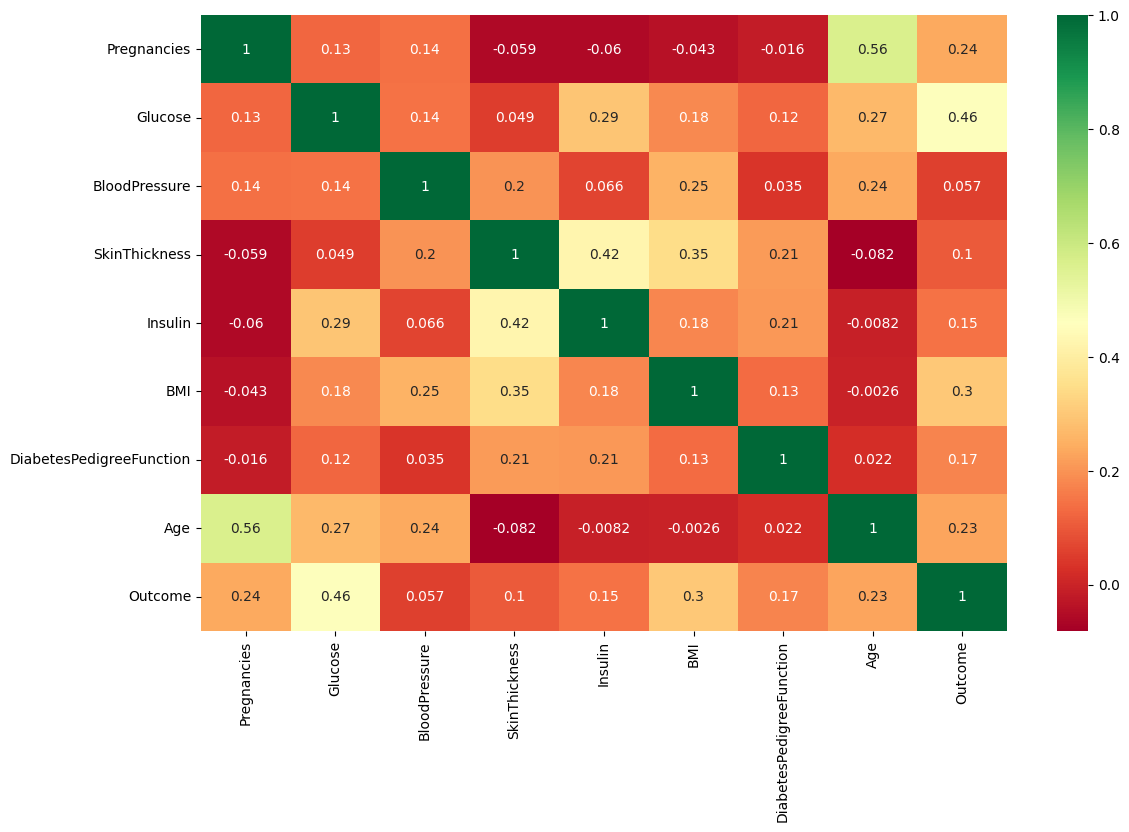

In [ ]:
plt.figure(figsize=(13,8))
sns.heatmap(diabetes_df_balanced.corr(), annot= True, cmap = 'RdYlGn')

In [ ]:
X = diabetes_df_balanced.drop(['Outcome'], axis = 1)
y = diabetes_df_balanced['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)

In [ ]:
from keras.layers import Dense, Dropout
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
def build_model():
    model = Sequential()

    # Input Layer
    model.add(Dense(units = 64, activation = 'relu', input_shape = [len(X.keys())]))
    model.add(Dropout(0.2))

    # Hidden Layer - I
    model.add(Dense(units = 128, activation= 'relu'))
    model.add(Dropout(0.2))

    # Hidden Layer - II
    model.add(Dense(units = 128, activation= 'relu'))
    model.add(Dropout(0.2))

    # Output Layer
    model.add(Dense(units = 1, activation='sigmoid'))

    # Optimizers
    # Learning rate 'alpha' = (0.00001 - 0.1)
    optimizers = Adam(learning_rate= 0.001)

    # Multiclass - categorical_crossentropy
    model.compile(loss = 'binary_crossentropy', optimizer = optimizers, metrics = ['accuracy'])

    return model

In [ ]:
model = build_model()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

In [ ]:
history = model.fit(X_train, y_train, epochs = 500, batch_size= 25, validation_split = 0.2)

Epoch 1/500
23/23 [==============================] - 2s 14ms/step - loss: 5.3659 - accuracy: 0.4875 - val_loss: 2.4389 - val_accuracy: 0.5286
Epoch 2/500
23/23 [==============================] - 0s 5ms/step - loss: 3.4524 - accuracy: 0.4982 - val_loss: 1.3216 - val_accuracy: 0.5786
Epoch 3/500
23/23 [==============================] - 0s 5ms/step - loss: 2.4054 - accuracy: 0.5250 - val_loss: 0.7118 - val_accuracy: 0.6429
Epoch 4/500
23/23 [==============================] - 0s 6ms/step - loss: 1.8821 - accuracy: 0.5393 - val_loss: 0.6062 - val_accuracy: 0.6643
Epoch 5/500
23/23 [==============================] - 0s 6ms/step - loss: 1.5429 - accuracy: 0.5321 - val_loss: 0.6458 - val_accuracy: 0.6214
Epoch 6/500
23/23 [==============================] - 0s 7ms/step - loss: 1.4525 - accuracy: 0.5304 - val_loss: 0.6078 - val_accuracy: 0.6714
Epoch 7/500
23/23 [==============================] - 0s 6ms/step - loss: 1.2958 - accuracy: 0.4946 - val_loss: 0.7016 - val_accuracy: 0.5500
Epoch 8/500


<Axes: >

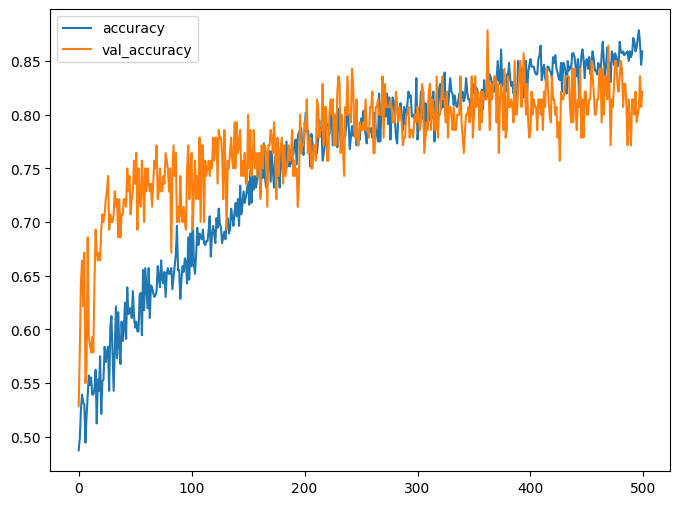

In [ ]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot(figsize = (8,6))

In [ ]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.6191 - accuracy: 0.7467


[0.6190711855888367, 0.746666669845581]

In [ ]:
predict = model.predict(X_test)
yhat = np.round(predict)

10/10 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, yhat)

array([[117,  32],
       [ 44, 107]])

<Axes: >

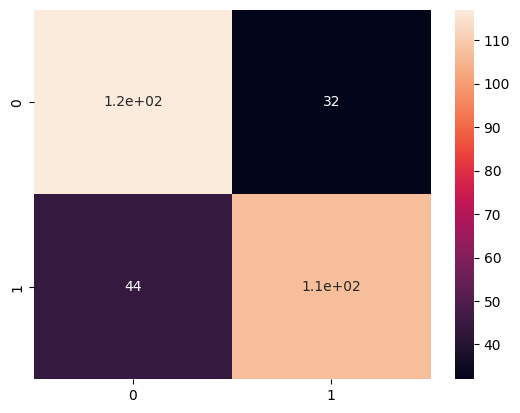

In [ ]:
sns.heatmap(confusion_matrix(y_test, yhat), annot = True)